# Item based recommender
Item-based collaborative filtering, pioneered by Amazon, is generally regarded as a faster and more reliable approach compared to user-based filtering, particularly when there are more users than items in the system. The reason behind this is that the average rating received by an item tends to be more stable over time, in contrast to the average rating given by a user to various items, which can change frequently. Another advantage of item-based filtering is its superior performance in situations where the ratings matrix contains many missing values, commonly referred to as a "sparse" matrix.

---
##1.&nbsp;Import libraries and files 💾
We'll be using the same book ratings csv as in the Popularity recommender notebook.

In [ ]:
import pandas as pd

In [ ]:
def gd_path(file_id):
    return f"https://drive.google.com/uc?export=download&id={file_id}"


files_id = {
    'links': "1GR8IQ2OXsFI8MNmv4bQIV1XXkq7n56MB",
    'movies': "1PDuCaAhhVTRLYdftMr6VqX23crMqB_qg",
    'rating': "1F4_-HBPBSySMjxdGxlykWVjvVn9AJ0BS",
    'tags': "1bH6HhZfqLT0JGqYxyRLQAk7UIpnYj4x4"
    }


links = pd.read_csv(gd_path(files_id['links']), sep=",")
movies = pd.read_csv(gd_path(files_id['movies']), sep=",")
rating = pd.read_csv(gd_path(files_id['rating']), sep=",")
tags = pd.read_csv(gd_path(files_id['tags']), sep=",")

---
##2.&nbsp;Refresh our memories of how the data looks 🍵

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


---
##3.&nbsp;User-Item matrix 💻
In order to construct an item-based memory-based recommender system, the initial stage involves creating a user-item matrix. This matrix serves as a fundamental component for storing and examining the interactions between users and items, enabling us to uncover similarities and make predictions. The user-item matrix acts as a representation of the ratings or preferences expressed by users for each item within the system.

In [ ]:
user_book_matrix = pd.pivot_table(data=rating,
                                  values='rating',
                                  index='userId',
                                  columns='movieId',
                                  fill_value=0)
user_book_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [ ]:
user_book_matrix.describe()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,...,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,1.381967,0.618852,0.277869,0.027049,0.246721,0.659836,0.281967,0.037705,0.081967,0.756557,...,0.005738,0.004918,0.006557,0.006557,0.005738,0.006557,0.005738,0.005738,0.005738,0.006557
std,1.938929,1.372156,0.960767,0.265114,0.873453,1.510862,0.950328,0.348896,0.522721,1.494983,...,0.141711,0.121466,0.161955,0.161955,0.141711,0.161955,0.141711,0.141711,0.141711,0.161955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.500000,3.000000,4.000000,4.000000,3.500000,4.000000,3.500000,3.500000,3.500000,4.000000


###3.1.&nbsp;Pearson correlation matrix
The Pearson correlation coefficient (PCC) measures the linear relationship between two sets of data. It takes values between -1 and 1, where -1 indicates a perfect negative correlation, 1 represents a perfect positive correlation, and 0 signifies no correlation at all.

In pandas, the `.corr()` method is employed to calculate the pairwise correlation among columns in a DataFrame, excluding any NaN (missing) values. This method generates a correlation matrix.

In [ ]:
book_correlations_matrix = user_book_matrix.corr()
book_correlations_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.231327,0.173213,-0.028917,0.192474,0.192686,0.143743,0.085477,0.177245,0.183382,...,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906,-0.028906
2,0.231327,1.000000,0.191945,0.071269,0.200526,0.158341,0.127569,0.141540,-0.021045,0.285086,...,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291,-0.018291
3,0.173213,0.191945,1.000000,0.067143,0.370171,0.196442,0.351513,0.296897,0.275812,0.136916,...,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729,-0.011729
4,-0.028917,0.071269,0.067143,1.000000,0.167910,0.053755,0.258075,0.148726,-0.016025,0.056000,...,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138,-0.004138
5,0.192474,0.200526,0.370171,0.167910,1.000000,0.215503,0.429890,0.265777,0.308085,0.110833,...,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456,-0.011456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193583,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642
193585,-0.028906,-0.018291,-0.011729,-0.004138,-0.011456,-0.017712,-0.012033,-0.004383,-0.006359,-0.020524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.001642


####3.1.1.&nbsp;Finding books similar to the most popular book - The Lovely Bones
Create a DataFrame of how correlated other books are to The Lovely Bones

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Find the ISBN for The Lovely Bones
lovely_bones_title_mask = movies["title"].str.contains('Toy Story', case=False)
lovely_bones_author_mask = movies["genres"].str.contains('Comedy', case=False)
lovely_bones_isbn = movies.loc[lovely_bones_title_mask & lovely_bones_author_mask, "movieId"].values[0]

# Select the column, from the above matrix, matching the ISBN of The Lovely Bones
lovely_bones_correlations_df = pd.DataFrame(book_correlations_matrix[lovely_bones_isbn])
lovely_bones_correlations_df.head()

,1
movieId,
1,1.000000
2,0.231327
3,0.173213
4,-0.028917
5,0.192474


Make the column titles more explanatory

In [ ]:
lovely_bones_correlations_df = lovely_bones_correlations_df.rename(columns={lovely_bones_isbn: 'toy_story_correlation'})
lovely_bones_correlations_df.head()

,toy_story_correlation
movieId,
1,1.000000
2,0.231327
3,0.173213
4,-0.028917
5,0.192474


Remove the correlation of The Lovely Bones to itself

In [ ]:
lovely_bones_correlations_df = lovely_bones_correlations_df[lovely_bones_correlations_df.index != lovely_bones_isbn]
lovely_bones_correlations_df.head()

,toy_story_correlation
movieId,
2,0.231327
3,0.173213
4,-0.028917
5,0.192474
6,0.192686


Order the correlations descendingly and look at the top 10

In [ ]:
lovely_bones_correlations_df = lovely_bones_correlations_df.sort_values(by="toy_story_correlation", ascending=False)
lovely_bones_correlations_df.head(10)

,toy_story_correlation
movieId,
3114,0.461761
1265,0.361540
780,0.358473
1073,0.357314
648,0.352847
788,0.350295
2355,0.345431
364,0.344248
34,0.341136


Let's have a deeper dig and see how many people rated both The Lovely Bones and the book being compared to see how many ratings influenced the correlation coefficient. We're doing this just to check that a good correlation didn't come from only 2 reviews. As if only two people have scored two books 10/10, then it is easy for these books to have a very strong correlation, but this figure may be misleading - remember the law of large numbers?

In [ ]:
no_of_users_rated_both_books = [sum((user_book_matrix[lovely_bones_isbn] > 0) & (user_book_matrix[isbn] > 0)) for isbn in lovely_bones_correlations_df.index]

lovely_bones_correlations_df['users_who_rated_both_movies'] = no_of_users_rated_both_books

lovely_bones_correlations_df.head(10)

,toy_story_correlation,users_who_rated_both_movies
movieId,,
3114,0.461761,81
1265,0.361540,97
780,0.358473,122
1073,0.357314,81
648,0.352847,106
788,0.350295,67
2355,0.345431,69
364,0.344248,107
34,0.341136,84


Let's have a look at the distribution of `users_who_rated_both_books` to see if there are any extremely low values

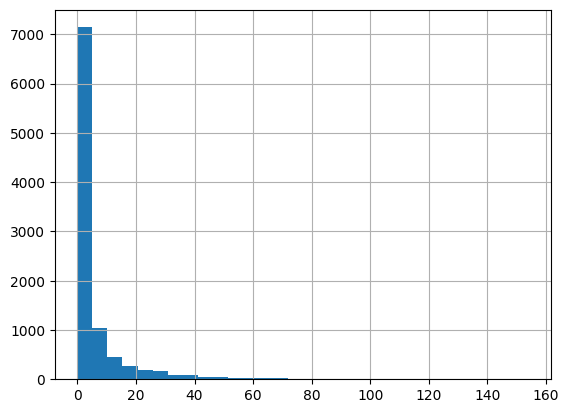

In [ ]:
lovely_bones_correlations_df['users_who_rated_both_movies'].hist(bins=30);

Looks like there are a lot of books that have been reviewed by people who also read The Lovely Bones less than 10 times. This could lead to misleading similarities as not enough people have rated both items. Therefore we'll remove any books where less than 10 people are `users_who_rated_both_books`. Ensuring customer satisfaction by not recommending unwelcome books.

In [ ]:
lovely_bones_correlations_df = lovely_bones_correlations_df[lovely_bones_correlations_df["users_who_rated_both_movies"] > 10]

Let's add the book titles and authors to see what our results are

In [ ]:
book_info_columns = ['movieId', 'title', 'genres']

lovely_bones_top_10_correlation = (lovely_bones_correlations_df
                                  .head(10)
                                  .reset_index()
                                  .merge(movies.drop_duplicates(subset='movieId'),
                                         on='movieId',
                                         how='left')
                                  [book_info_columns + ['toy_story_correlation',	'users_who_rated_both_movies']]
                                  )
lovely_bones_top_10_correlation

,movieId,title,genres,toy_story_correlation,users_who_rated_both_movies
0,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,0.461761,81
1,1265,Groundhog Day (1993),Comedy|Fantasy|Romance,0.361540,97
2,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,0.358473,122
3,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,0.357314,81
4,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller,0.352847,106
5,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi,0.350295,67
6,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,0.345431,69
7,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,0.344248,107
8,34,Babe (1995),Children|Drama,0.341136,84
9,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,0.330813,88


Looks like the best recommendation for people who liked The Lovely Bones is another book by Alice Sebold

In [ ]:
movies.loc[lovely_bones_author_mask, book_info_columns].drop_duplicates()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9734,193571,Silver Spoon (2014),Comedy|Drama
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy


###3.2.&nbsp;Cosine similarity correlation matrix
Cosine similarity determines the similarity between two vectors in a multi-dimensional space. It quantifies the cosine of the angle between the vectors, providing a value between -1 and 1.

Unlike the Pearson correlation coefficient, which measures the linear relationship between two sets of data, cosine similarity focuses on the direction rather than the magnitude of the vectors. A cosine similarity value of 1 indicates that the vectors are perfectly aligned, while a value of -1 suggests they are completely opposite in orientation. A value of 0 implies no similarity between the vectors.

In the context of data analysis using pandas, cosine similarity is not calculated directly through a specific method like the `.corr()` method for Pearson correlation. Instead, it is commonly computed using mathematical formulas or specific libraries, here we use our old friend SKLearn.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

books_cosines_matrix = pd.DataFrame(cosine_similarity(user_book_matrix.T),
                                    columns=user_book_matrix.columns,
                                    index=user_book_matrix.columns)
books_cosines_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


####3.2.1.&nbsp;Finding books similar to the most popular book - The Lovely Bones
This process is virtually the same as we did for correlation comparison above

In [ ]:
# Create a DataFrame using the values from 'books_cosines_matrix' for the 'lovely_bones_isbn' book.
lovely_bones_cosines_df = pd.DataFrame(books_cosines_matrix[lovely_bones_isbn])

# Rename the column 'lovely_bones_isbn' to 'lovely_bones_cosine'
lovely_bones_cosines_df = lovely_bones_cosines_df.rename(columns={lovely_bones_isbn: 'lovely_bones_cosine'})

# Remove the row with the index 'lovely_bones_isbn'
lovely_bones_cosines_df = lovely_bones_cosines_df[lovely_bones_cosines_df.index != lovely_bones_isbn]

# Sort the 'lovely_bones_cosines_df' by the column 'lovely_bones_cosine' column in descending order.
lovely_bones_cosines_df = lovely_bones_cosines_df.sort_values(by="lovely_bones_cosine", ascending=False)

# Find out the number of users rated both The Lovely Bones and the other book
no_of_users_rated_both_books = [sum((user_book_matrix[lovely_bones_isbn] > 0) & (user_book_matrix[isbn] > 0)) for isbn in lovely_bones_cosines_df.index]

# Create a column for the number of users who rated The Lovely Bones and the other book
lovely_bones_cosines_df['users_who_rated_both_movies'] = no_of_users_rated_both_books

# Remove recommendations that have less than 10 users who rated both books.
lovely_bones_cosines_df = lovely_bones_cosines_df[lovely_bones_cosines_df["users_who_rated_both_movies"] > 10]

# Display the first 10 rows of the 'lovely_bones_cosines_df' DataFrame.
lovely_bones_cosines_df.head(10)

,lovely_bones_cosine,users_who_rated_both_movies
movieId,,
3114,0.572601,81
480,0.565637,132
780,0.564262,122
260,0.557388,134
356,0.547096,154
364,0.541145,107
1210,0.541089,116
648,0.538913,106
1265,0.534169,97


Add the titles and authors to the top 10

In [ ]:

lovely_bones_top_10_cosine = (lovely_bones_cosines_df
                                  .head(10)
                                  .reset_index()
                                  .merge(movies.drop_duplicates(subset='movieId'),
                                         on='movieId',
                                         how='left')
                                  [book_info_columns + ['lovely_bones_cosine',	'users_who_rated_both_movies']]
                                  )
lovely_bones_top_10_cosine

,movieId,title,genres,lovely_bones_cosine,users_who_rated_both_movies
0,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,0.572601,81
1,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,0.565637,132
2,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller,0.564262,122
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,0.557388,134
4,356,Forrest Gump (1994),Comedy|Drama|Romance|War,0.547096,154
5,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,0.541145,107
6,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,0.541089,116
7,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller,0.538913,106
8,1265,Groundhog Day (1993),Comedy|Fantasy|Romance,0.534169,97
9,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,0.530381,106


---
##4.&nbsp;Challenge: build a function 😃
Make a function that takes in an isbn and an integer, n. The output should be the top n recommendations for the inputted isbn. Use the cosine similarity as your comparison rating.

In [ ]:
# Happy coding :)